In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from tyssue.io import hdf5
from tyssue.generation.shapes import AnnularSheet

from tyssue_taylor.models.annular import AnnularGeometry as geom

# Simulating an image processing error

In this part we will study the effect of an image processing error. To simulate such an error, we apply a Gaussian noise on the coordinates on the organoid. We obtain a new organoid, called the 'experimental' organoid (in contrast with the initial 'theoritical' organoid). Then, we adjust the line tension values to the experimental organoid and mesure the difference between the resulting line tensions noted $L'$ and the true line tensions from the theoritical organoid noted $L^*$.
The perturbation has four magnitudes :
1. copy means no perturbation has been applied. 
2. very sligh : one vertex is moved according to a rrv ~ $N(1,0.02)$
3. sligh : 10% of the vertices are moved according to iid rrv ~ $N(1,0.01)$
4. substancial : all vertices are moved according to iid rrv ~ $N(1,0.01)$
    

In [2]:
path = 'synth_res_moving_X.csv'
df = pd.read_csv(path, sep=',')
print(df)

     Unnamed: 0  index  standard deviation  mean gap  nb non zero gap  \
0             0      0             0.00125  0.000993               48   
1             1      1             0.00125  0.000685               48   
2             2      2             0.00125  0.001141               48   
3             3      3             0.00125  0.001334               48   
4             4      4             0.00125  0.000809               48   
5             5      5             0.00125  0.002668               48   
6             6      6             0.00125  0.001330               48   
7             7      7             0.00125  0.001382               48   
8             8      8             0.00125  0.001150               48   
9             9      9             0.00125  0.001013               48   
10           10     10             0.00125  0.001103               48   
11           11     11             0.00125  0.000909               48   
12           12     12             0.00125  0.00155

## Mean gap

The following plot shows the mean gap value divided by the number of vertices between $L^*$ and $L'$.

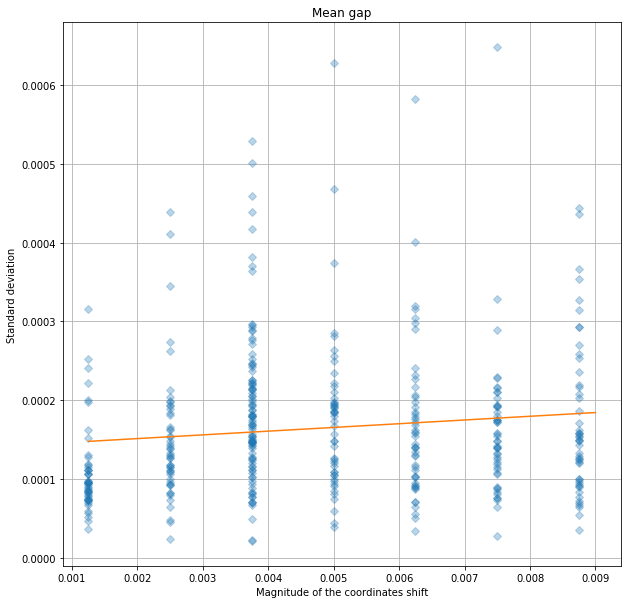

In [8]:
plt.figure(1)
plt.figure(figsize=(10,10))
# Mean gap
y = np.array(df['mean gap'])/12
x = np.array(df['standard deviation'])
plt.plot(x,y,'D',alpha=0.3)
plt.xlabel('Magnitude of the coordinates shift')
plt.ylabel('Standard deviation')
plt.title('Mean gap')
fit = np.polyfit(x,y,1)
p = np.poly1d(fit)
xp = np.linspace(0.00125, 0.009, 100)
plt.plot(xp, p(xp), '-')
plt.grid(True)

## Max gap

The following plot shows the max gap value between $L^*$ and $L'$.

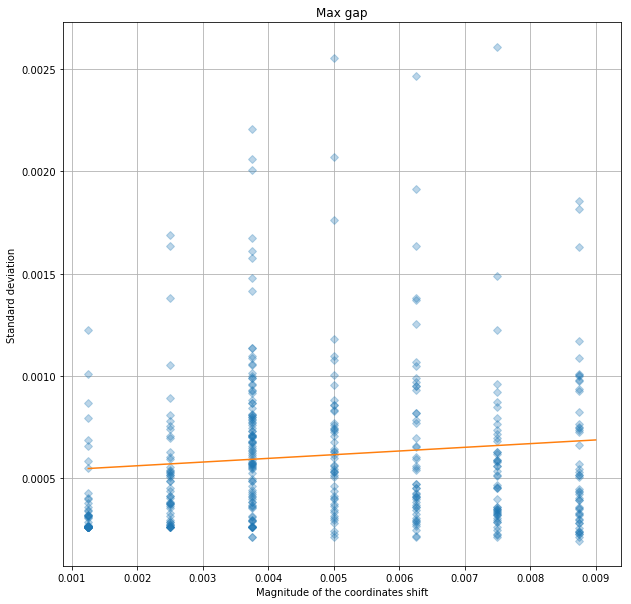

In [5]:
plt.figure(1)
plt.figure(figsize=(10,10))
# Mean gap
y = np.array(df['max gap'])/12
x = np.array(df['standard deviation'])
plt.plot(x,y,'D',alpha=0.3)
plt.xlabel('Magnitude of the coordinates shift')
plt.ylabel('Standard deviation')
plt.title('Max gap')
fit = np.polyfit(x,y,1)
p = np.poly1d(fit)
xp = np.linspace(0.00125, 0.009, 100)
plt.plot(xp, p(xp), '-')
plt.grid(True)

## Solving time

The following plot shows the solving time of the numerical instances relatively to the magnitude of the shift.

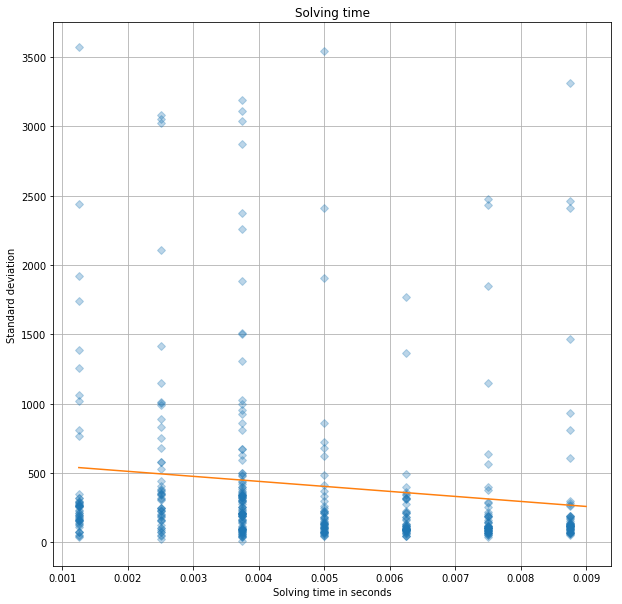

In [6]:
plt.figure(1)
plt.figure(figsize=(10,10))
# Mean gap
y = np.array(df['solving time'])
x = np.array(df['standard deviation'])
plt.plot(x,y,'D',alpha=0.3)
plt.xlabel('Solving time in seconds')
plt.ylabel('Standard deviation')
plt.title('Solving time')
fit = np.polyfit(x,y,1)
p = np.poly1d(fit)
xp = np.linspace(0.00125, 0.009, 100)
plt.plot(xp, p(xp), '-')
plt.grid(True)

Latest results

In [63]:
path = '/home/fquinton/Documents/Stage_M2_ICA-master/tyssue-taylor/simulation/lm_nr_nl'

In [64]:
with open('/home/fquinton/Documents/Stage_M2_ICA-master/tyssue-taylor/assets/benchmark_instances/list_seed.json',
          'r') as inputfile:
    list_seed = json.load(inputfile)['list']

In [65]:
dsets = hdf5.load_datasets('/home/fquinton/Documents/Stage_M2_ICA-master/tyssue-taylor/assets/pipeline_test_theoritical_organo.hdf5')
th_organo = AnnularSheet('th_organo', dsets)
geom.update_all(th_organo)


In [66]:
organo_dic = {}
settings_dic = {}
for seed in list_seed:
    with open(path+'/exp_res'+str(seed)+'/exp_organo_settings'+str(seed)+'.json') as file:
        settings_dic[seed] = json.load(file)
    dsets = hdf5.load_datasets(path+'/exp_res'+str(seed)+'/exp_organo'+str(seed)+'.hdf5')
    organo_dic[seed] = AnnularSheet('exp_organo'+str(seed), dsets)
    geom.update_all(organo_dic[seed])
    specs = {'settings': {'lumen_elasticity': settings_dic[seed]['lumen_elasticity'],
                         'lumen_prefered_vol': settings_dic[seed]['lumen_prefered_vol'],
                         'lumen_volume': settings_dic[seed]['lumen_volume']}}
    organo_dic[seed].update_specs(specs, reset = False)
    

In [67]:
list_tension_error = []
for seed in list_seed:
    list_tension_error.append(np.divide(np.abs(th_organo.edge_df.line_tension[:3*organo.Nf].values-
                              organo_dic[seed].edge_df.line_tension[:3*organo.Nf].values),
                              th_organo.edge_df.line_tension[:3*organo.Nf].values))

/home/fquinton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [68]:
apical_tension_dif = []
lateral_tension_dif = []
for error in list_tension_error:
    apical_tension_dif.append(error[:th_organo.Nf])
    lateral_tension_dif.append(error[2*th_organo.Nf:])
apical_tension_dif = np.array(apical_tension_dif)
lateral_tension_dif = np.array(lateral_tension_dif)

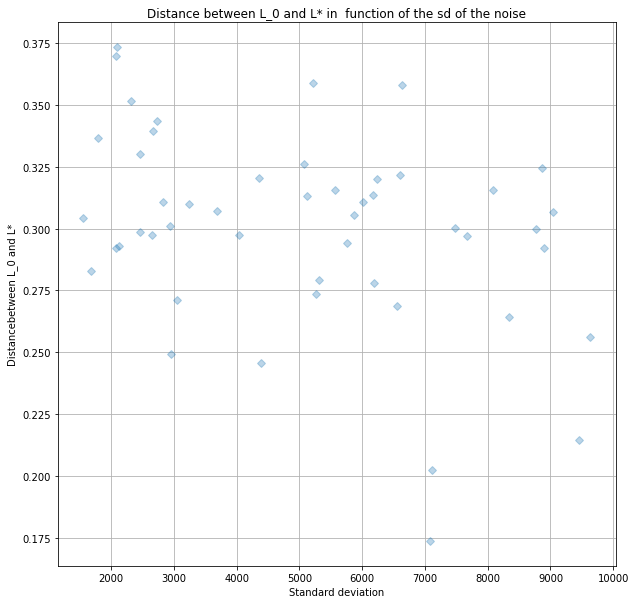

In [69]:

plt.ylabel("Distancebetween L_0 and L*")
plt.grid(True)

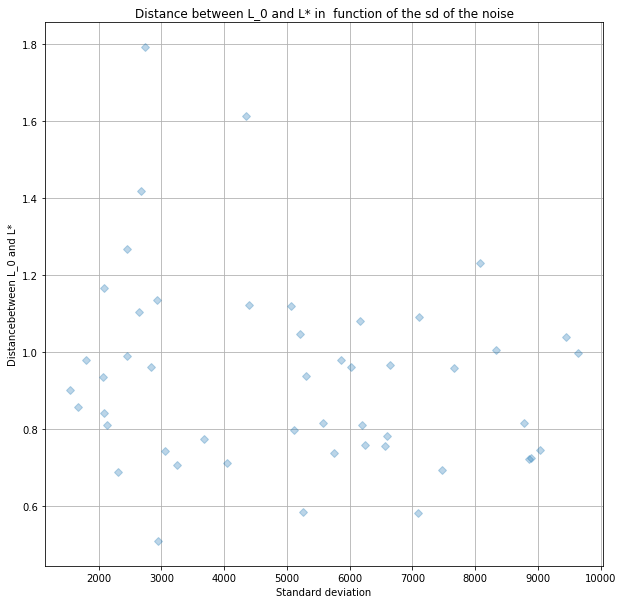

In [71]:
plt.figure(1)
plt.figure(figsize=(10,10))
y = np.array(np.mean(lateral_tension_dif, axis=1))
x = np.array(list_seed)
plt.plot(x,y,'D',alpha=0.3)
plt.title('Distance between L_0 and L* in  function of the sd of the noise')
plt.xlabel('Standard deviation')
plt.ylabel("Distancebetween L_0 and L*")
plt.grid(True)

# Effect of the precision of the initial point

In this section, we will study the effect of the error between the initial point $L_0$ and the true line tension values $L^*$. Given a theoritical organoid with known line tensions $L^*$ and coordinates $X^*$, we generate a copy of this organoid with different line tensions $L_0$ and solve for the energy optimal coordinates $X'$. Then we compute the distance between the theoritical organoid's coordinates $X^*$ and the coordinates $X'$ of the organoid computed with initial point $L_0$.

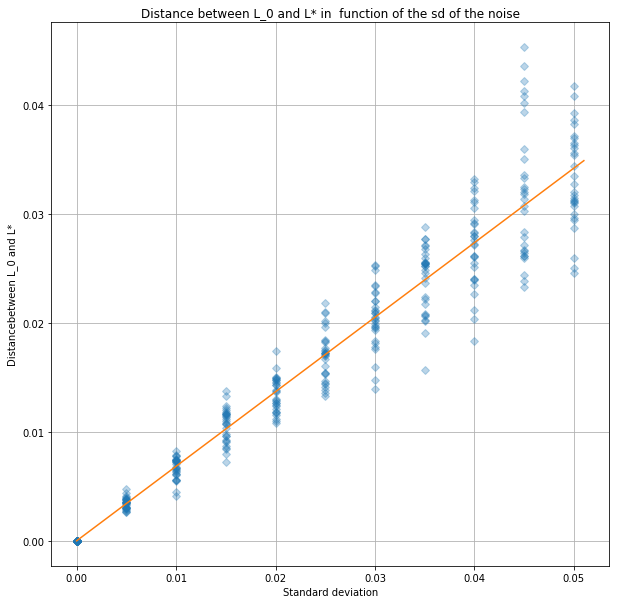

In [53]:
plt.figure(1)
plt.figure(figsize=(10,10))
y = np.array(df['final diff'])
x = np.array(df['standard deviation'])
plt.plot(x,y,'D',alpha=0.3)
plt.title('Distance between L_0 and L* in  function of the sd of the noise')
plt.xlabel('Standard deviation')
plt.ylabel("Distancebetween L_0 and L*")
fit = np.polyfit(x,y,1)
p = np.poly1d(fit)
xp = np.linspace(0, 0.051, 100)
plt.plot(xp, p(xp), '-')
plt.grid(True)